# **Mean Shift Algorithm**

### Import Necessary Libraries

In [7]:
import pandas as pd
import numpy as np
import warnings
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
import urllib.request
from PIL import Image

### Import the Image to the notebook

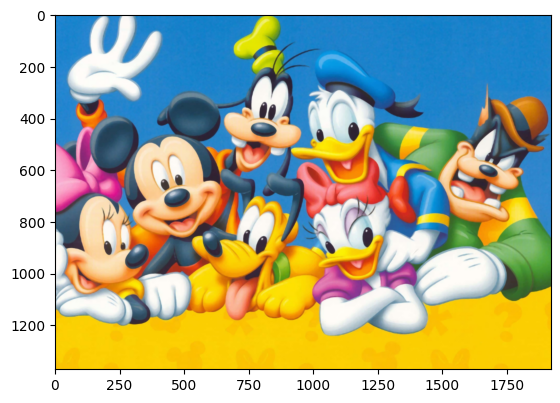

In [86]:
oimg = np.array(Image.open(urllib.request.urlopen("https://wallpapers.com/images/hd/cartoon-pictures-q3hxkk0gmw6vnivj.jpg")))
plt.imshow(img)

### Convertion of BGR image to RGB image

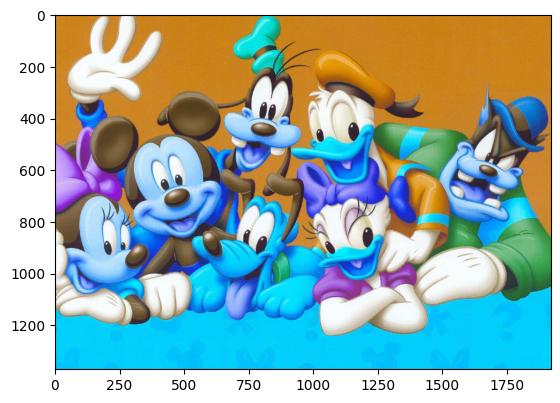

In [87]:
plt.imshow(cv.cvtColor(oimg,cv.COLOR_BGR2RGB))

### Image Smoothing

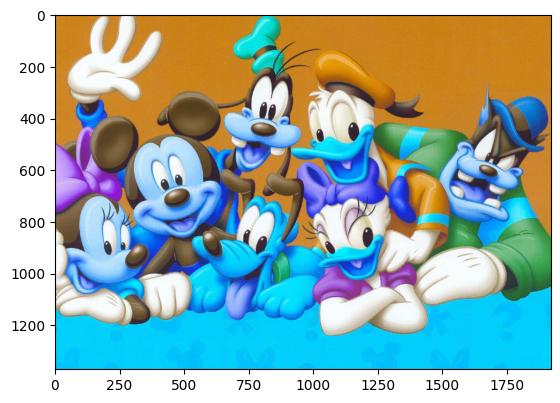

In [88]:
img= cv.medianBlur(img,7)
plt.imshow(cv.cvtColor(oimg,cv.COLOR_BGR2RGB))

In [89]:
img=oimg.reshape((-1,3))
display(img.shape)

(2632320, 3)

In [35]:
img=np.float32(img)
img.dtype

dtype('float32')

In [42]:
ms=MeanShift(bandwidth=estimate_bandwidth(img,quantile=0.1,n_samples=2000),bin_seeding=True)
ms.fit(img)

MeanShift(bandwidth=45.588251349436, bin_seeding=True)

In [49]:
clusters = ms.predict(img)
clusters

array([0, 0, 0, ..., 1, 1, 1])

In [69]:
labeled= ms.labels_
labeled

array([0, 0, 0, ..., 1, 1, 1])

In [70]:
img_array = np.unique(labeled)
img_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [57]:
ms.cluster_centers_

array([[ 31.05296  , 132.05928  , 203.54948  ],
       [249.55777  , 204.37172  ,   3.7554193],
       [242.43735  , 243.46982  , 240.78777  ],
       [ 50.85887  ,  60.892776 ,  77.46957  ],
       [249.79219  , 213.20905  , 167.08632  ],
       [ 66.06453  , 128.30849  ,  52.538475 ],
       [119.566956 , 177.44943  , 104.17659  ],
       [244.60223  , 145.66524  , 163.68507  ],
       [162.12871  ,  51.808147 , 136.62859  ]], dtype=float32)

In [61]:
cluster_int8=np.uint8(ms.cluster_centers_)
cluster_int8

array([[ 31, 132, 203],
       [249, 204,   3],
       [242, 243, 240],
       [ 50,  60,  77],
       [249, 213, 167],
       [ 66, 128,  52],
       [119, 177, 104],
       [244, 145, 163],
       [162,  51, 136]], dtype=uint8)

In [95]:
result=np.zeros(img.shape,dtype=np.uint8)
for label in img_array:
  result[labeled==label,:] = cluster_int8[label,:]
result.shape

(2632320, 3)

In [94]:
result=result.reshape(oimg.shape)
result.shape

(1371, 1920, 3)

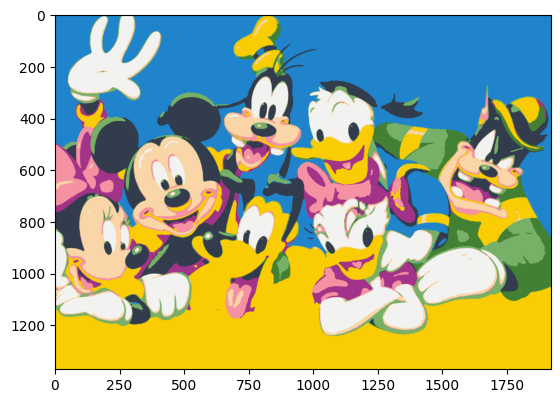

In [93]:
plt.imshow(result)

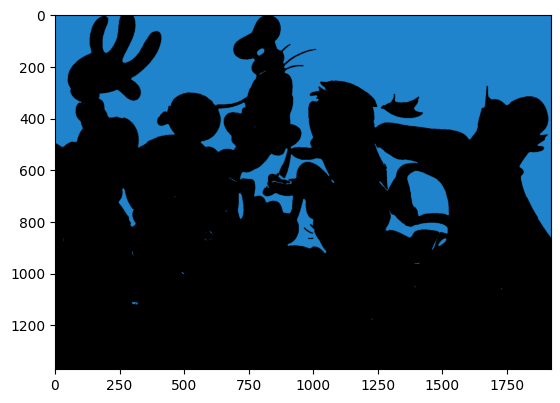

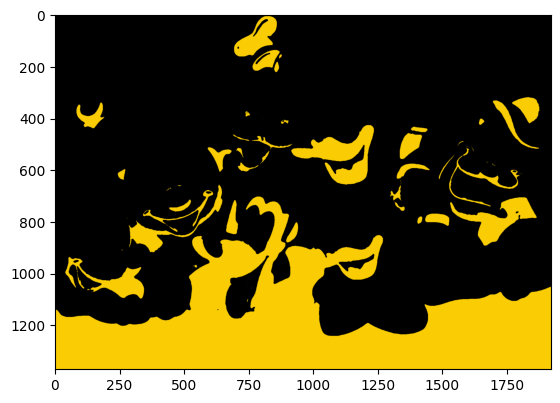

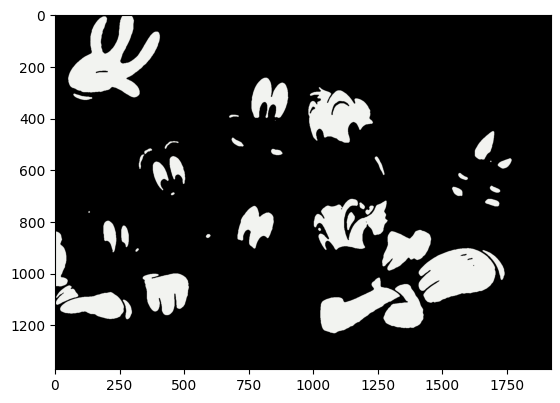

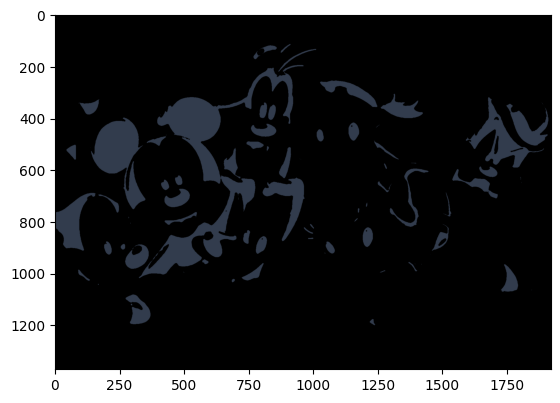

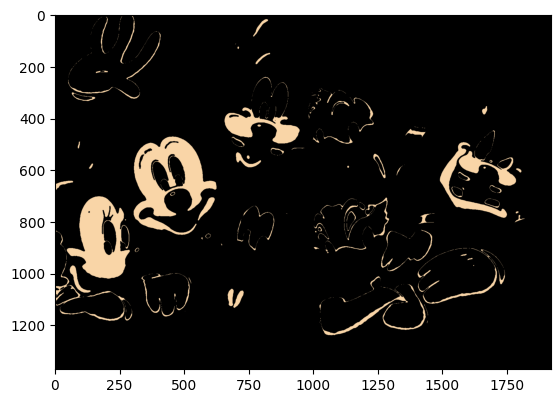

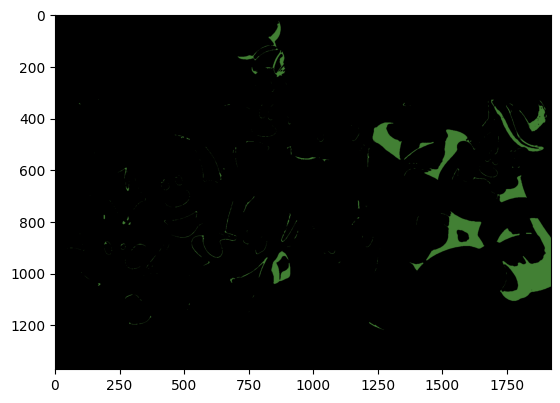

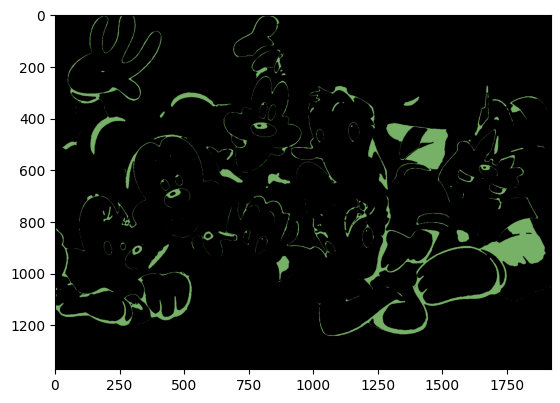

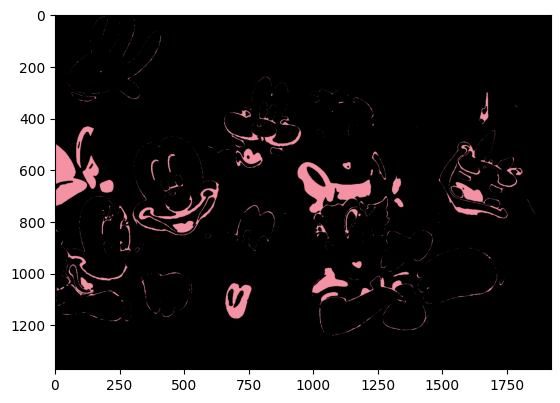

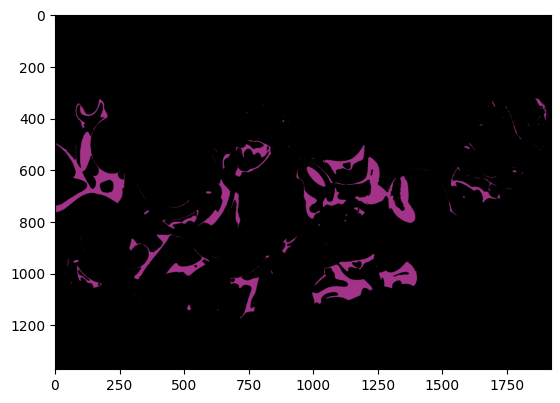

In [103]:
for label in img_array:
  result=np.zeros(img.shape,dtype=np.uint8)
  result[labeled==label,:] = cluster_int8[label,:]
  plt.imshow(result.reshape(oimg.shape))
  plt.show()